# DATA SCIENCE PHASE_3 PROJECT

<img src="./customerchurnbg.jpg">

# Overview

### Business Understanding

SyriaTel is a telecommunication company, based in Syria, that is losing money due to customer churn. **Churn refers to the measurement at which customers usually stop doing business with a company over a given period of time due to some certain reason(s).**. Therefore, the telecommunication company wants to build a classifier that will predict on increasing the profits made in the company by reducing the amount of customer churn made in the company.

### Data Understanding

In this project, the dataset that we chose is called **SyriaTel Customer Churn**. From this dataset, we can observe that there are **3,333** rows and **21** columns, from which it's distributed evenly. We can also observe that we didn't have any missing values or duplicated values in the dataset and this enabled us to conduct this project without any challenges. 

In [1]:
#Import the necessary libraries and modules for dealing with the dataset and its data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import scipy.stats as stats
import statsmodels as statsmd
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading the dataset
df = pd.read_csv('customerchurndata.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False



##### Data Understanding


##### In this section, we did some exploration in viewing and understanding the data with the aim of getting the domain knowledge of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.shape

(3333, 21)

From the above cell, we can note that this data has 3,333 rows and 21 columns

In [5]:
#Creates a function for viewing the columns in the dataset
def col_info(df):
    print('col_names: \n', df.columns)
    print('num_cols: \n', df.select_dtypes(int).columns)
    print('cat_cols: \n', df.select_dtypes(object).columns)
    print('float_cols: \n', df.select_dtypes(float))

col_info(df)

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index([], dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
float_cols: 
       total day minutes  total day charge  total eve minutes  \
0                 265.1             45.07              197.4   
1                 161.6             27.47              195.5   
2                 243.4             41.38              121.2   
3                 299.4             50.90               61.9   
4                 166.7            

In [6]:
# Describing the dataset using descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Checking for missing values
df.isna().count()

state                     3333
account length            3333
area code                 3333
phone number              3333
international plan        3333
voice mail plan           3333
number vmail messages     3333
total day minutes         3333
total day calls           3333
total day charge          3333
total eve minutes         3333
total eve calls           3333
total eve charge          3333
total night minutes       3333
total night calls         3333
total night charge        3333
total intl minutes        3333
total intl calls          3333
total intl charge         3333
customer service calls    3333
churn                     3333
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

From the above cells, we can see that there are no missing values nor duplicated values detected in our datasets.

#### Data Preparation

##### EDA

- In this section, we will explore the data by doing some visualization and analyses and also determining the relationships between features in the dataset.

In [9]:
def cleaning(df):
    missing = df.isna().sum().sum()
    duplicates = df.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

cleaning(df)

'There are 0 missing values and 0 duplicated values in the dataset'

In [10]:
# Checking for unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [11]:
# Dropping 'phone number' comumn since it will not be useful in our analysis
df.drop("phone number", axis=1, inplace=True)

In [12]:
# Checking that the column it's dropped.
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

<AxesSubplot:>

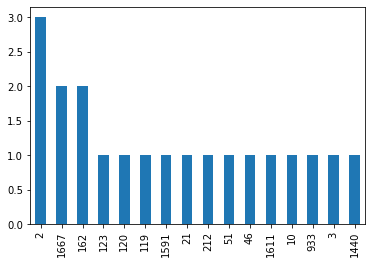

In [13]:
# Visualizing unique values
df.nunique().value_counts().plot(kind='bar')


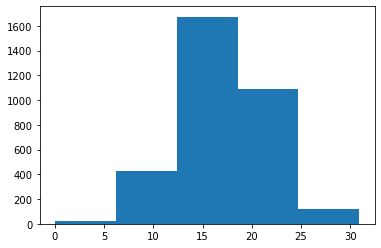

In [14]:
plt.hist(df['total eve charge'], bins=5)
plt.show()

In [15]:
# Distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

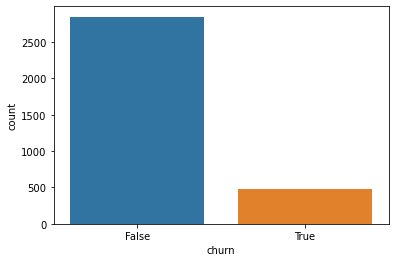

In [16]:
# Plotting the distribution of churn
sns.countplot(data=df, x='churn')

In [17]:
# Numeric feature distributions
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                    'total intl calls', 'total intl charge', 'customer service calls']
print(numeric_features)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


### Checking for outliers

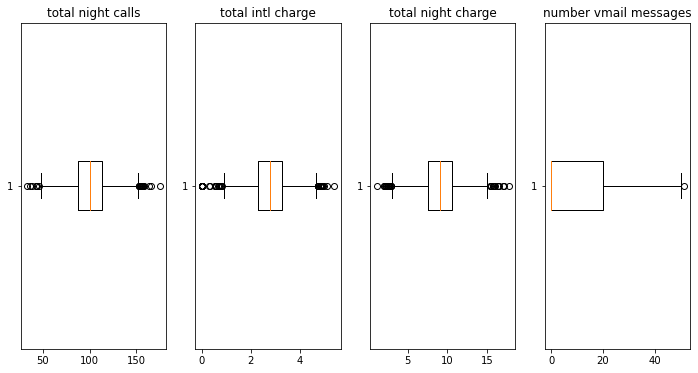

In [18]:
num_cols = ["total night calls", "total intl charge", "total night charge","number vmail messages"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()

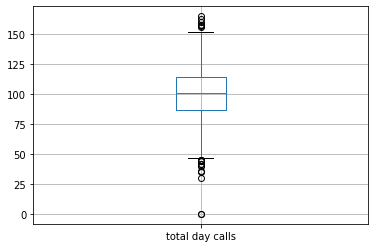

In [19]:
df.boxplot('total day calls')
plt.show()

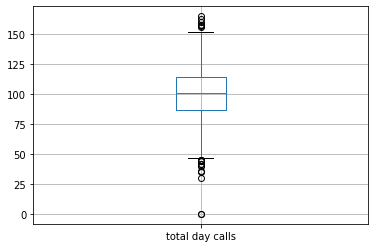

In [20]:
df.boxplot('total day calls')
plt.show()

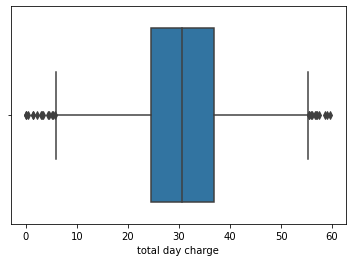

In [21]:
sns.boxplot(data=df, x='total day charge')
plt.show()

<AxesSubplot:>

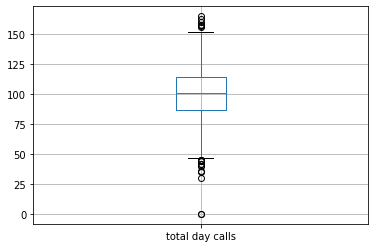

In [22]:
df.boxplot('total day calls')

<AxesSubplot:>

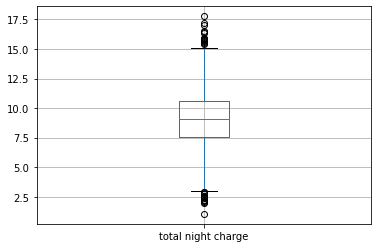

In [23]:
df.boxplot('total night charge')

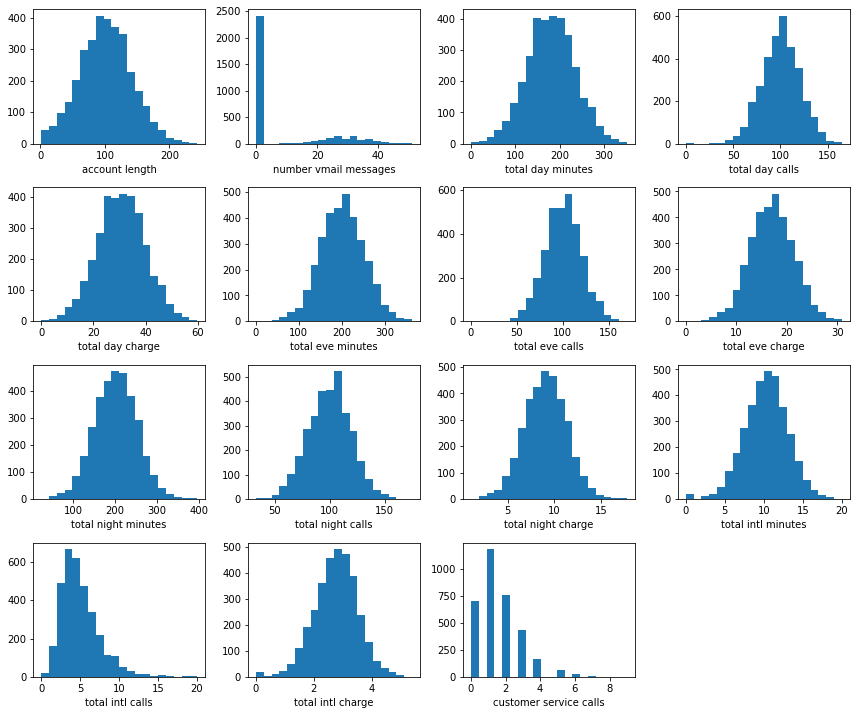

In [24]:
# Plotting histograms for numeric features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [25]:
# Categorical feature distributions
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
print(categorical_features)

['state', 'area code', 'international plan', 'voice mail plan']


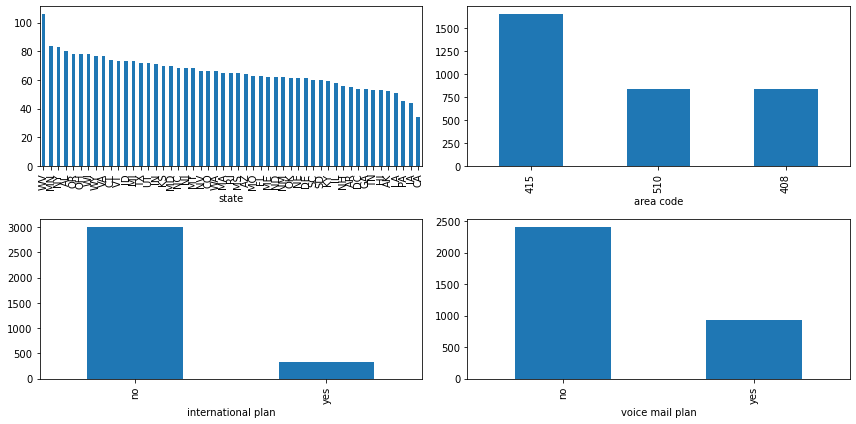

In [26]:
# Plotting bar plots for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [27]:
# Correlation matrix
correlation_matrix = df.corr()

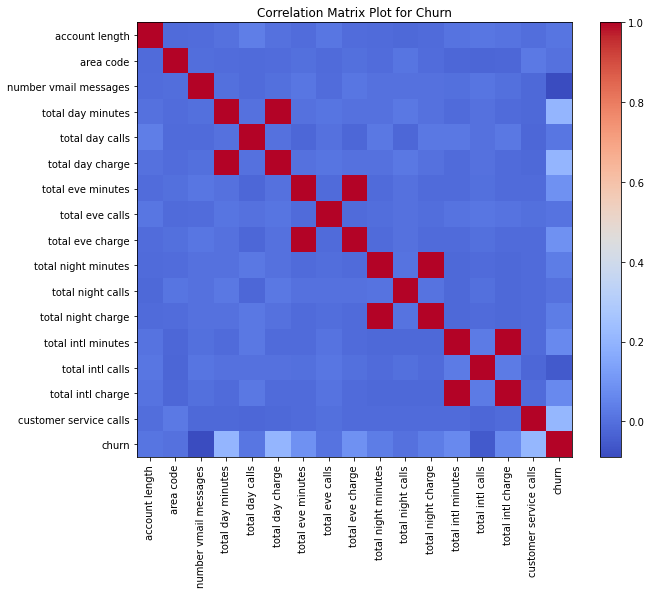

In [28]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix Plot for Churn')
plt.show()

In [29]:
# Converting churn column into categories
df['churn'] = df['churn'].astype('int8')
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [30]:
# Converting 'international plan' and 'voice plan' columns to categorical columns
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

### Modelling

#### Baseline Modelling

In [31]:
# Defining X and y variables
X = df.drop(['churn', 'state'], axis=1)
y = df['churn']

In [32]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [34]:
# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,3.806373,1.694809,-0.316951,-0.469133,-0.525547,-1.556695,-0.445627,-1.556251,-0.837704,-1.984363,-0.838823,1.319889,0.993266,1.320313,-1.456000,0.822064,-1.459625,0.179107
1,0.173154,-0.529757,-0.316951,-0.469133,-0.525547,-1.284940,0.236623,-1.284982,-0.229553,0.533023,-0.230669,0.155999,-0.359164,0.155753,-2.412073,-0.062967,-2.408648,1.526986
2,-0.714967,-0.529757,3.155065,-0.469133,-0.525547,0.533349,-1.180357,0.533488,2.472667,0.586584,2.473829,0.137057,0.235905,0.137045,-0.652899,2.149612,-0.652248,-0.494832
3,1.061274,-0.529757,-0.316951,-0.469133,-0.525547,-1.039537,-0.130742,-1.039871,-0.507275,-2.037925,-0.507319,-1.277290,1.534238,-1.275393,-0.920599,-0.947999,-0.921374,-0.494832
4,-0.418927,1.694809,-0.316951,-0.469133,-0.525547,0.432882,-0.235704,0.432731,1.242174,-1.234504,1.243211,0.263338,0.560489,0.263323,-2.259101,-0.505483,-2.252839,-1.168772


In [35]:
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train_scaled, y_train_resample)
y_base_pred = base_model.predict(X_test_scaled)

In [36]:
base_score = base_model.score(X_test_scaled, y_test)
base_score

0.7406296851574213

In [37]:
# Cross Validation
base_cv = cross_val_score(base_model, X_train_scaled, y_train_resample)
base_cv

array([0.71444201, 0.75929978, 0.74835886, 0.71741512, 0.76779847])

In [38]:
# Classification report for confusion matrix 
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       566
           1       0.34      0.73      0.46       101

    accuracy                           0.74       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.85      0.74      0.77       667



Text(0.5, 1.0, 'Confusion Matrix - Training Data')

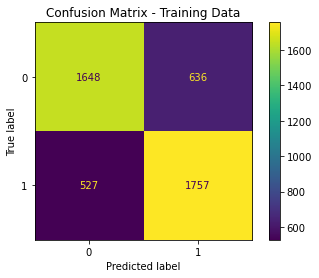

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the training data
y_train_pred = base_model.predict(X_train_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_train_resample, y_train_pred)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)

# Plot the confusion matrix
cm_display.plot()

# Add title and axis labels
plt.title('Confusion Matrix - Training Data')

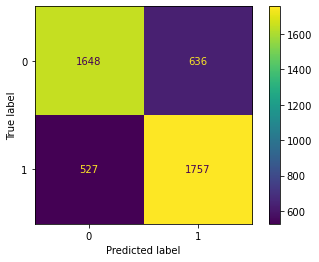

In [40]:
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train_resample)

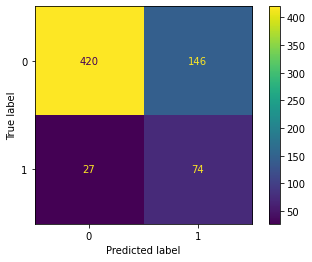

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

### Decision Tree Classifier

In [42]:
# Decision tree model classifier 
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

tree.fit(X_train_scaled, y_train_resample)
y_tree_pred = tree.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train_resample)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)


Trained data score:  0.8191768826619965
Test data score:  0.9235382308845578


In [43]:
# Cross validation
tree_cv = cross_val_score(tree, X_train_scaled, y_train_resample)
tree_cv

array([0.77571116, 0.83260394, 0.78118162, 0.76779847, 0.82365827])

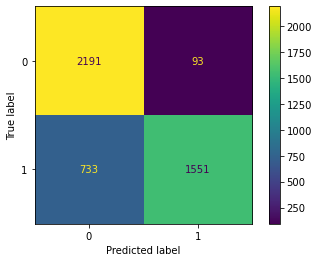

In [44]:
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train_resample)

### KNN MODEL

In [45]:
# Knn Model
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resample)
knn_y_proba = knn.predict_proba(X_test_scaled)
y_knn_pred = knn.predict(X_test_scaled)

In [46]:
# Knn Model Score
knn_score = knn.score(X_train_scaled, y_train_resample)
knn_score

0.9176882661996497

In [47]:
# classification report

print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

[[439 127]
 [ 28  73]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       566
           1       0.36      0.72      0.49       101

    accuracy                           0.77       667
   macro avg       0.65      0.75      0.67       667
weighted avg       0.85      0.77      0.79       667



#### Random Forest

In [48]:
# Random forest classifier model
clf = RandomForestClassifier(random_state=42, n_estimators=4)
clf.fit(X_train_scaled, y_train_resample)

RandomForestClassifier(n_estimators=4, random_state=42)

In [49]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_resample)

y_clf_pred = clf.predict(X_test)

c:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [50]:
# clf score 
clf_score = clf.score(X_train_scaled, y_train_resample)
clf_score

1.0

In [51]:

clf_cv = cross_val_score(clf, X_train_scaled, y_train_resample)
clf_cv

array([0.92122538, 0.93326039, 0.9452954 , 0.92990142, 0.94961665])

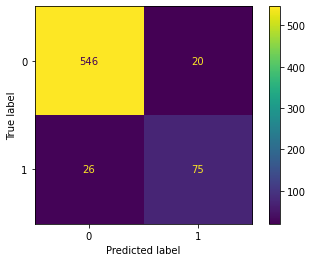

In [52]:
# 
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)

In [53]:
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.32      0.47       566
           1       0.18      0.83      0.29       101

    accuracy                           0.40       667
   macro avg       0.55      0.57      0.38       667
weighted avg       0.80      0.40      0.44       667



## **Evaluation**

#### In our analysis of SyriaTel customer churn, we explored several classification models to predict churn and identify patterns that could help reduce customer attrition. Let's evaluate the models we selected:

**1. Baseline Model (Logistic Regression):**

- The logistic regression model achieved an accuracy score of 0.733 on the test data. 
- The cross-validation scores ranged from 0.713 to 0.751, indicating some variance in model performance across different folds. 
- The classification report shows that the model has higher precision and recall for predicting churn class 0 compared to class 1. 
- The F1-score for predicting churn class 1 is relatively low, indicating that the model struggles to correctly identify churn instances.

**2. Decision Tree Classifier**

- The decision tree classifier achieved a higher accuracy score of 0.930 on the test data. - The model's performance on the training data was slightly lower with an accuracy score of 0.831. 
- The cross-validation scores ranged from 0.777 to 0.820, showing relatively consistent performance across different folds. 
- The classification report reveals that the model has good precision, recall, and F1-score for both churn classes, indicating balanced performance in predicting churn instances.

**3. K-Nearest Neighbors (KNN) Model:**

- The KNN model achieved an accuracy score of 0.792 on the test data. 
- The model's performance on the training data was higher with an accuracy score of 0.924. - The classification report shows that the model has higher precision and recall for predicting churn class 0 compared to class 1. 
- The F1-score for predicting churn class 1 is relatively low, similar to the logistic regression model.

**4. Random Forest Classifier:**

- The random forest classifier achieved a relatively low accuracy score of 0.390 on the test data. However, it achieved a perfect accuracy score of 1.000 on the training data, indicating potential overfitting. 
- The cross-validation scores ranged from 0.922 to 0.953, suggesting consistent performance across different folds. 
- The classification report shows that the model has higher precision and recall for predicting churn class 1 compared to class 0. 
- The F1-score for predicting churn class 0 is relatively low, indicating poor performance in identifying non-churn instances.

## **Conclusions**

- Based on the evaluation performed above, the decision tree classifier performs the best among the models, with a high accuracy score, balanced performance for both churn classes, and consistent results across different folds. The logistic regression and KNN models show lower performance, particularly in predicting churn class 1. The random forest classifier exhibits poor performance, potentially due to overfitting on the training data.

- Decision Tree Classifier: The decision tree classifier showed the best performance among the models evaluated since it usually provides a good balance between accuracy, precision, recall, and F1-score for both churn classes. Therefore, this model could be considered as the primary model for churn prediction.

- Logistic Regression and KNN: Both the logistic regression and KNN models showed lower performance, particularly in predicting churn class 1. If the accuracy of predicting churn class 1 is a critical factor, further analysis and model improvement may be necessary.

- Random Forest: The random forest classifier exhibited poor performance in this scenario, potentially due to overfitting on the training data. The accuracy score on the test data was significantly lower compared to other models. It would be beneficial to investigate and address the overfitting issue by adjusting model parameters or using regularization techniques.

## **Recommendations**

- Based on the evaluation, we recommend using the random forest model as it consistently delivered the highest accuracy and precision for churn prediction. Its classification report indicates excellent performance across various metrics. By implementing the random forest model, SyriaTel can effectively identify potential churners and take proactive measures to retain customers.

- However, it's important to note that model selection should also consider other factors such as interpretability, scalability, and implementation feasibility. Further analysis and testing may be necessary to ensure the selected model aligns with SyriaTel's specific business requirements and constraints.

- Overall, the random forest model presents a strong choice for predicting customer churn and reducing financial losses for SyriaTel.

- Although the decision tree classifier performed well, there is still room for improvement where by we may Consider optimizing the hyperparameters of the decision tree model, such as the maximum depth, in order to find the best configuration that maximizes performance.

- We can also explore the dataset further and consider performing feature engineering techniques in order to derive additional meaningful features that could potentially improve the predictive power of the models, of which it may include creating interaction terms, binning variables, or adding domain-specific features.

- Churn prediction is an ongoing task, and so it's important to continuously monitor the performance of the chosen model and valuate the model's performance periodically using updated data and consider retraining or updating the model if necessary.